#### Esercizio due lezione sette del 14/10/2020

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv(r"C:\Users\Laura\Desktop\PythonDataScienceHandbook-master\notebooks\data\Person_Gender_Height_Weight_Index.csv")
print("DATAFRAME UTILIZZATO \n",data)

DATAFRAME UTILIZZATO 
      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [2]:
#Prima di tutto vogliamo calcolare l’indice di massa corporea 
BMI=(data['Weight']/(data['Height']/100)**2)

In [3]:
#dal dataset originale, creare un nuovo dataset bmi_ds selezionando solo le colonne che ci interessano corrispondenti a:
#genere, peso e altezza (vedere funzione pd.DataFrame e parametro columns)
print("\nCOPIA DEL DATASET \n")
bmi_ds=pd.DataFrame(data,columns=['Gender','Height', 'Weight'] )


COPIA DEL DATASET 



In [4]:
#salvare il dataset bmi_ds come csv in locale 
print("\nDATASET TRASFORMATO IN CSV \n")
Es2_BMI=bmi_ds.to_csv()


DATASET TRASFORMATO IN CSV 



In [5]:
#aggiungere una colonna generica a bmi_ds (vedere sia la forma dataset[‘colonna’]=… che la funzione insert di Python)
print("\n AGGIUNTA DELLA COLONNA BMI \n")
bmi_ds['BMI']=BMI
print("Uso la forma dataset[‘colonna’]=… \n\n",bmi_ds)
#la funzione insert non riesco a farla funzionare


 AGGIUNTA DELLA COLONNA BMI 

Uso la forma dataset[‘colonna’]=… 

      Gender  Height  Weight        BMI
0      Male     174      96  31.708284
1      Male     189      87  24.355421
2    Female     185     110  32.140248
3    Female     195     104  27.350427
4      Male     149      61  27.476240
..      ...     ...     ...        ...
495  Female     150     153  68.000000
496  Female     184     121  35.739603
497  Female     141     136  68.407022
498    Male     150      95  42.222222
499    Male     173     131  43.770256

[500 rows x 4 columns]


In [6]:
#salvare il dataset bmi_ds come csv in locale 
print("\nDATASET TRASFORMATO IN CSV \n")
Es2_BMI=bmi_ds.to_csv()


DATASET TRASFORMATO IN CSV 



##### GRAFICI A BARRE

ISTOGRAMMI CON FUNZIONE SEABORN 

Istogramma con i valori di BMI dei 500 individui, colorati diversamente per uomini e donne 



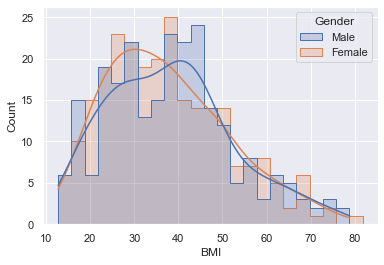

In [9]:
#Importazione librerie
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
#visualizzazione di tipo bar chart come visto nel precedente esercizio usando la funzione histplot di seaborn
print("ISTOGRAMMI CON FUNZIONE SEABORN \n")
# Visualizzare tutti i valori di BMI dei 500 individui, colorati diversamente per uomini e donne 
print("Istogramma con i valori di BMI dei 500 individui, colorati diversamente per uomini e donne \n")
seaborn.histplot(data=bmi_ds, x='BMI',binwidth=3,stat='count', hue='Gender', kde='true', element='step');

Istogramma base 



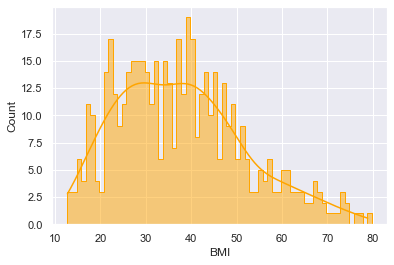

In [10]:
print("Istogramma base \n")
seaborn.histplot(data=bmi_ds, x='BMI',binwidth=1,stat='count', kde='true',color='orange', element='step');

In [11]:
print("Istogramma con funzione FacetGrid \n")
# g = seaborn.FacetGrid(bmi_ds,col="Height",row="BMI",hue="Gender")
# g.map_dataframe(seaborn.histplot, x="Gender")

Istogramma con funzione FacetGrid 



##### GRAFICI SCATTERPLOT

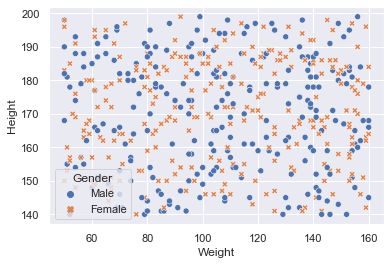

In [23]:
print("Scatterplot base \n")
seaborn.scatterplot(data= bmi_ds, x= 'Weight',y='Height', hue='Gender',style='Gender');

In [24]:
print("Scatterplot con la funzione Facet \n")
# g = seaborn.FacetGrid(bmi_ds,col="Weight",row="Height",hue="Gender")
# g.map_dataframe(seaborn.scatterplot, x="Gender")

Scatterplot con la funzione Facet 



##### GRAFICI BOXPLOT E CATPLOT

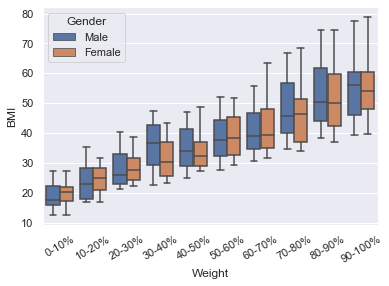

In [49]:
g1 =seaborn.boxplot(data= bmi_ds, x=pd.cut(bmi_ds['Weight'],10, labels=['0-10%','10-20%','20-30%','30-40%',
                                                                        '40-50%','50-60%','60-70%','70-80%',
                                                                        '80-90%','90-100%']), y='BMI',hue='Gender')
g1.set_xticklabels(g1.get_xticklabels(),rotation=30);


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

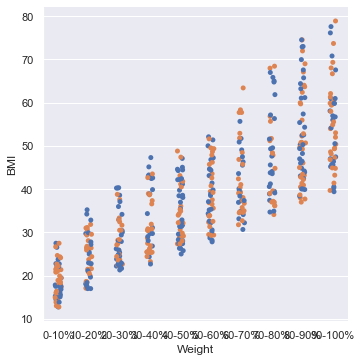

In [71]:
g2 =seaborn.catplot(data= bmi_ds, x=pd.cut(bmi_ds['Weight'],10,labels=['0-10%','10-20%','20-30%','30-40%','40-50%','50-60%','60-70%','70-80%', '80-90%','90-100%']), y='BMI',hue='Gender')
g2.set_xticklabels(g2.get_xticklabels(),rotation=30);


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

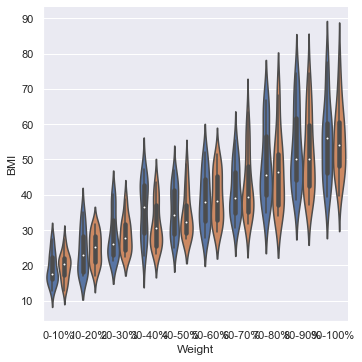

In [70]:
bmi_ds.all()
g3 =seaborn.catplot(data= bmi_ds, x=pd.cut(bmi_ds['Weight'],10,labels=['0-10%','10-20%','20-30%','30-40%',
                                                                       '40-50%','50-60%','60-70%','70-80%',
                                                                      '80-90%','90-100%']), y='BMI',hue='Gender',kind="violin")
g3.set_xticklabels(g3.get_xticklabels(),rotation=30);


In [131]:
# usare BMI suddividendolo in gruppi di valori come variabile indipendente (x) e altre variabili come dipendenti (y).
#pd.to_numeric()
obesità=bmi_ds.loc[(bmi_ds['BMI']>=40)]
sovrappeso=bmi_ds.loc[(bmi_ds['BMI']<40) & (bmi_ds['BMI'] >= 25)]
regolare=bmi_ds.loc[(bmi_ds['BMI']<25) & (bmi_ds['BMI']>=18.51)]
sottopeso= bmi_ds.loc[(bmi_ds['BMI']<18.51)]

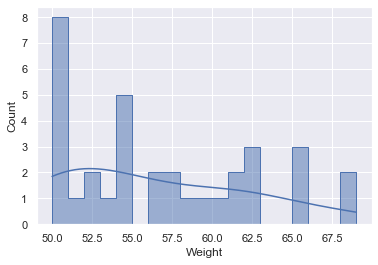

In [134]:
seaborn.histplot(data=sottopeso, x='Weight',binwidth=1,stat='count', kde='true', element='step');